# 強化学習勉強会2021_プログラム課題1

## 課題内容：(定常)バンディット問題を実装


        



In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class Environment(object):

    def __init__(self, prob):
        self._prob = prob

    def play(self, arm):
        if self._prob[arm] > random.random():
            return 1
        else:
            return 0

In [ ]:
class Agent(object):

    def __init__(self, len_arm, policy, param):
        self._len_arm = len_arm
        self._policy = Policy(policy, param)
        self._Q = None
        self._n = None

    def initialize(self):
        self._Q = np.zeros(self._len_arm)
        self._n = np.zeros(self._len_arm)

    def update(self, arm, reward):
        self._n[arm] += 1
        self._Q[arm] += (reward - self._Q[arm]) / self._n[arm] # 標本平均手法

    def select_arm(self):
        act = self._policy._act_policy(self._Q)
        return act

In [ ]:
class Policy(object):
    def __init__(self, policy, param):
        if 'e_greedy' == policy:
            self._epsilon = param
            self._act_policy = self.e_greedy
        if 'random' == policy:
            self._act_policy = self._random

    def e_greedy(self, Q):
        if self._epsilon < random.random():
            max_Q = max(Q)
            maxIndex = np.where(Q == max_Q)[0] # Q値が複数ある場合、ランダムで選択する
            return random.choice(maxIndex) # greedy行動を返す
        else:
            return random.randrange(len(Q)) # ランダムで選ばれた行動を返す

    def _random(self, Q):
        return random.randrange(len(Q))

In [ ]:
class Simulator(object):

    def __init__(self, trial, step, len_arm, prob, policy, param):
        self._agent = Agent(len_arm, policy, param)
        self._env = Environment(prob)
        self._prob = prob
        self._trial = trial
        self._step = step
        self._epsilon = param
        self._regret = np.zeros((trial, step))

    
    def run(self):
        for t in range(self._trial):
            self._agent.initialize()
            for s in range(self._step):
                arm = self._agent.select_arm()
                reward = self._env.play(arm)
                self._agent.update(arm, reward)
                self.calc_regret(t, s, arm)
        self.print_regret()

    
    def calc_regret(self, t, s, arm):
        self._regret[t][s] += max(self._prob) - self._prob[arm]
        if s != 0: self._regret[t][s] += self._regret[t][s-1]
    
    def print_regret(self):
        plt.plot(np.arange(self._step), np.mean(self._regret, axis=0), label='epsilon='+str(self._epsilon))
        plt.xlabel('step')
        plt.ylabel('regret')
        plt.legend()
        plt.show()

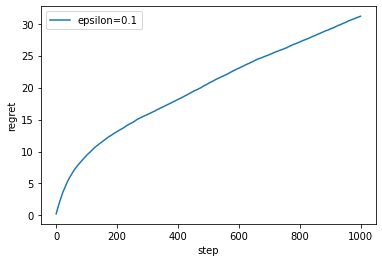

In [ ]:
arm_prob = np.array([0.3, 0.5, 0.7]) # 腕の本数、確率はここで変更可
policy = 'e_greedy' # 方策はここで変更可 e_greedyまたはrandom
epsilon = 0.1
trial = 100
step = 1000

sim = Simulator(trial, step, len(arm_prob), arm_prob, policy, param=epsilon)
sim.run()